<a href="https://colab.research.google.com/github/ohki-yu0225/toukei_1B_1/blob/main/240418_notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 統計学実習IB 第1回
担当：大木 有<br>
日時：2024年4月12日（金）

## 講義内容
- 統計学実習で使用する主なライブラリの練習
    - Pandas
    - Numpy
    - Matplotlib

## Pandas, Numpy, Matplotlibのインポート

In [2]:
!pip install japanize_matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e199a2ab1d8ae96487db9cf4d8acc455e0820793e21cd3ac77c6d45853ccd51c
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


## Pandas
### データの読み込み

In [3]:
# データの読み込み（時系列データ）
print('データソース：国勢調査時系列データ')
time_series_sample = pd.read_csv('time_series_sample.csv', encoding="shift-jis") #データの読み込み(日本語が含まれているファイルは"shift-jisを指定するのがベター")
time_series_sample.head(10)

データソース：国勢調査時系列データ


,年,全国（総数）,全国（男性）,全国（女性）,埼玉（総数）,埼玉（男性）,埼玉（女性）
0,1920,55963053,28044185,27918868,1319533,641161,678372
1,1925,59736822,30013109,29723713,1394461,682052,712409
2,1930,64450005,32390155,32059850,1459172,718779,740393
3,1935,69254148,34734133,34520015,1528854,753802,775052
4,1940,73114308,36566010,36548298,1608039,798321,809718
5,1945,71998104,33894059,38104045,2047261,955753,1091508
6,1950,84114574,41241192,42873382,2146445,1049695,1096750
7,1955,90076594,44242657,45833937,2262623,1110083,1152540
8,1960,94301623,46300445,48001178,2430871,1200573,1230298
9,1965,99209137,48692138,50516999,3014983,1511947,1503036


### データの抽出

In [4]:
#任意の行のデータを抽出
time_series_sample[10:15]

,年,全国（総数）,全国（男性）,全国（女性）,埼玉（総数）,埼玉（男性）,埼玉（女性）
10,1970,104665171,51369177,53295994,3866472,1951219,1915253
11,1975,111939643,55090673,56848970,4821340,2437128,2384212
12,1980,117060396,57593769,59466627,5420480,2739175,2681305
13,1985,121048923,59497316,61551607,5863678,2961591,2902087
14,1990,123611167,60696724,62914443,6405319,3245868,3159451


In [5]:
#任意の列のデータを抽出
time_series_sample[['埼玉（男性）','埼玉（女性）']]

,埼玉（男性）,埼玉（女性）
0,641161,678372
1,682052,712409
2,718779,740393
3,753802,775052
4,798321,809718
5,955753,1091508
6,1049695,1096750
7,1110083,1152540
8,1200573,1230298
9,1511947,1503036


In [6]:
#任意の行のデータを抽出（iloc）
#ilocは行を番号で指示する df.iloc[行の番号]
display(time_series_sample.iloc[10])
display(time_series_sample.iloc[10:15])

,10
年,1970
全国（総数）,104665171
全国（男性）,51369177
全国（女性）,53295994
埼玉（総数）,3866472
埼玉（男性）,1951219
埼玉（女性）,1915253


,年,全国（総数）,全国（男性）,全国（女性）,埼玉（総数）,埼玉（男性）,埼玉（女性）
10,1970,104665171,51369177,53295994,3866472,1951219,1915253
11,1975,111939643,55090673,56848970,4821340,2437128,2384212
12,1980,117060396,57593769,59466627,5420480,2739175,2681305
13,1985,121048923,59497316,61551607,5863678,2961591,2902087
14,1990,123611167,60696724,62914443,6405319,3245868,3159451


In [7]:
#任意の行・列のデータを抽出（iloc）
#ilocは行・列を番号で指示する df.iloc[行の番号, 列の番号]
display(time_series_sample.iloc[10, 4])
display(time_series_sample.iloc[10:15, 1:3])

np.int64(3866472)

,全国（総数）,全国（男性）
10,104665171,51369177
11,111939643,55090673
12,117060396,57593769
13,121048923,59497316
14,123611167,60696724


In [8]:
#任意の行のデータを抽出（loc）
#locは行をインデックス・ラベルで指示する df.loc[行のインデックス・ラベル]
time_series_sample_new = time_series_sample.set_index('年', inplace = False) #インデックスを'年'に設定し直す
display(time_series_sample_new.loc[1970])
display(time_series_sample_new.loc[1970:1990])

,1970
全国（総数）,104665171
全国（男性）,51369177
全国（女性）,53295994
埼玉（総数）,3866472
埼玉（男性）,1951219
埼玉（女性）,1915253


,全国（総数）,全国（男性）,全国（女性）,埼玉（総数）,埼玉（男性）,埼玉（女性）
年,,,,,,
1970,104665171,51369177,53295994,3866472,1951219,1915253
1975,111939643,55090673,56848970,4821340,2437128,2384212
1980,117060396,57593769,59466627,5420480,2739175,2681305
1985,121048923,59497316,61551607,5863678,2961591,2902087
1990,123611167,60696724,62914443,6405319,3245868,3159451


In [9]:
#任意の行のデータを抽出（loc）
#locは行・列をインデックス・ラベルで指示する df.loc[行のインデックス・ラベル, 列のラベル]
display(time_series_sample_new.loc[1970, '埼玉（総数）'])
display(time_series_sample_new.loc[1970:1990, ['全国（男性）', '全国（女性）']])

np.int64(3866472)

,全国（男性）,全国（女性）
年,,
1970,51369177,53295994
1975,55090673,56848970
1980,57593769,59466627
1985,59497316,61551607
1990,60696724,62914443


In [10]:
# 条件を指定してデータを抽出
# df[df['y列のラベル'] == x] y列のラベルがxの行を抽出（'=='以外にも'>', '>=', '<', '<='）なども使える。詳細はPythonの「比較演算子」を確認する）
display(time_series_sample[(time_series_sample['年'] == 2020)])
display(time_series_sample[(time_series_sample['年'] > 1995)])

,年,全国（総数）,全国（男性）,全国（女性）,埼玉（総数）,埼玉（男性）,埼玉（女性）
20,2020,126146099,61349581,64796518,7344765,3652169,3692596


,年,全国（総数）,全国（男性）,全国（女性）,埼玉（総数）,埼玉（男性）,埼玉（女性）
16,2000,126925843,62110764,64815079,6938006,3500224,3437782
17,2005,127767994,62348977,65419017,7054243,3554843,3499400
18,2010,128057352,62327737,65729615,7194556,3608711,3585845
19,2015,127094745,61841738,65253007,7266534,3628418,3638116
20,2020,126146099,61349581,64796518,7344765,3652169,3692596


### データの追加

In [11]:
# 列の追加
time_series_sample['全国（男女比）'] = time_series_sample['全国（男性）']/time_series_sample['全国（女性）']
time_series_sample['埼玉（男女比）'] = time_series_sample['埼玉（男性）']/time_series_sample['埼玉（女性）']
time_series_sample.head(5)

,年,全国（総数）,全国（男性）,全国（女性）,埼玉（総数）,埼玉（男性）,埼玉（女性）,全国（男女比）,埼玉（男女比）
0,1920,55963053,28044185,27918868,1319533,641161,678372,1.004489,0.945147
1,1925,59736822,30013109,29723713,1394461,682052,712409,1.009736,0.957388
2,1930,64450005,32390155,32059850,1459172,718779,740393,1.010303,0.970807
3,1935,69254148,34734133,34520015,1528854,753802,775052,1.006203,0.972582
4,1940,73114308,36566010,36548298,1608039,798321,809718,1.000485,0.985925


## Numpy

### PandasのデータをNumpyで処理

In [12]:
# PandasのDataFrame形式のデータをnumpyのarray形式に変換
saitama_pop = np.array(time_series_sample['埼玉（総数）']) #1次元配列になる
saitama_pop_mf = np.array(time_series_sample[['埼玉（男性）','埼玉（女性）']]) #2次元配列になる
print(saitama_pop)
print(saitama_pop_mf)

[1319533 1394461 1459172 1528854 1608039 2047261 2146445 2262623 2430871
 3014983 3866472 4821340 5420480 5863678 6405319 6759311 6938006 7054243
 7194556 7266534 7344765]
[[ 641161  678372]
 [ 682052  712409]
 [ 718779  740393]
 [ 753802  775052]
 [ 798321  809718]
 [ 955753 1091508]
 [1049695 1096750]
 [1110083 1152540]
 [1200573 1230298]
 [1511947 1503036]
 [1951219 1915253]
 [2437128 2384212]
 [2739175 2681305]
 [2961591 2902087]
 [3245868 3159451]
 [3419218 3340093]
 [3500224 3437782]
 [3554843 3499400]
 [3608711 3585845]
 [3628418 3638116]
 [3652169 3692596]]


### データの抽出

In [13]:
# numpyの行列からデータを抽出
#1次元配列のarray
print(saitama_pop[0]) #array[x]でx番目のデータを抽出
print(saitama_pop[1:4]) #array[x:y]でxからy-1番目までのデータを抽出
print(saitama_pop[-1]) #[-1]を指定すれば、配列の最後のデータを抽出

# 2次元配列のarray
print(saitama_pop_mf[0]) #array[x]でx行目のデータを抽出
print(saitama_pop_mf[2, 0]) #array[x, y]でx行、y列目のデータを抽出

1319533
[1394461 1459172 1528854]
7344765
[641161 678372]
718779


### 最大値、最小値、平均値、中央値、合計などの計算

In [14]:
# 1次元行列の計算
print(f'最小値: {saitama_pop.min()}') # 最小値
print(f'最大値: {saitama_pop.max()}') # 最大値
print(f'平均値: {saitama_pop.mean()}') # 平均値
print(f'中央値: {np.median(saitama_pop)}') # 中央値

最小値: 1319533
最大値: 7344765
平均値: 4197473.619047619
中央値: 3866472.0


In [15]:
# 2次元行列の計算
#全要素の合計
# axisを指定しないと全要素を対象に計算を行う
all_sum = saitama_pop_mf.sum()
print(f'総数の合計: {all_sum}')

# 行方向の合計
# axis=0を指定すると行方向に計算を行う
# 行方向の合計は1970年から2020年までの男女別人口の合計
low_sum = saitama_pop_mf.sum(axis=0)
print(f'男性数の合計: {low_sum[0]}')
print(f'女性数の合計: {low_sum[1]}')
# 列方向の平均値
# axis=1を指定すると行方向に計算を行う
# 列方向の合計は1970年から2020年の各年の男女別人口の合計（=各年の人口総数）
column_sum = saitama_pop_mf.sum(axis=1)
print(f'2020年の総数: {column_sum[-1]}')

総数の合計: 88146946
男性数の合計: 44120730
女性数の合計: 44026216
2020年の総数: 7344765


## Matplotlib

### 折れ線グラフの出力

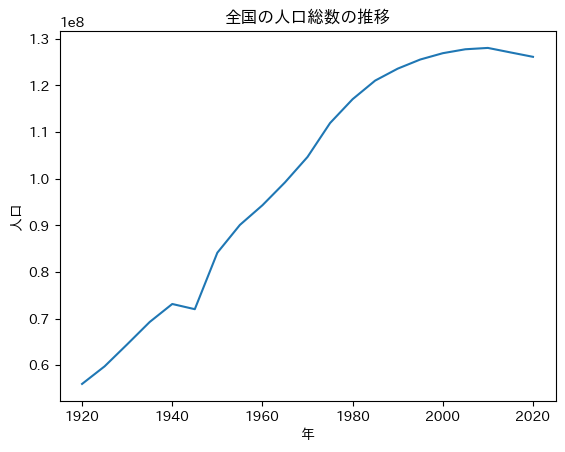

In [17]:
# プロットの作成
plt.plot(time_series_sample['年'], time_series_sample['全国（総数）']) #x軸, y軸にプロットしたい変数の列を指定

# タイトルと軸ラベルの追加
plt.title('全国の人口総数の推移')
plt.xlabel('年')
plt.ylabel('人口')

# グラフの表示
plt.show()

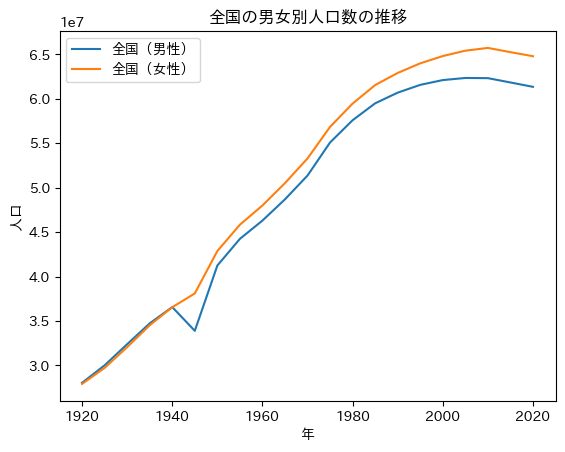

In [18]:
#複数の線を同時に出力
# プロットの作成
plt.plot(time_series_sample['年'], time_series_sample[['全国（男性）', '全国（女性）']]) #x軸, y軸にプロットしたい変数の列を指定

# タイトルと軸ラベルの追加
plt.title('全国の男女別人口数の推移')
plt.xlabel('年')
plt.ylabel('人口')

# 凡例の追加
plt.legend(['全国（男性）', '全国（女性）'])

# グラフの表示
plt.show()

### 散布図の出力

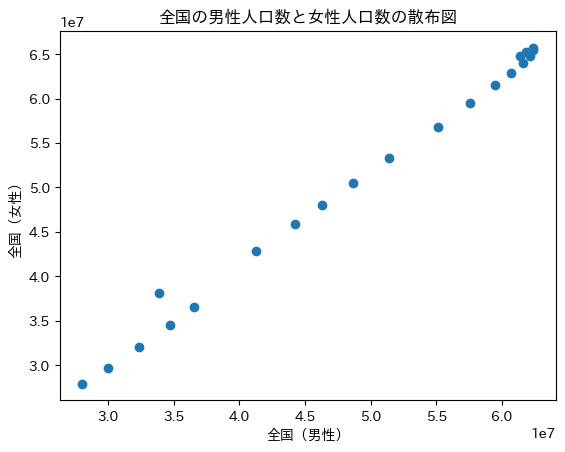

In [19]:
# プロットの作成
plt.plot(time_series_sample['全国（男性）'], time_series_sample['全国（女性）'], 'o') #x軸, y軸にプロットしたい変数の列を指定

# タイトルと軸ラベルの追加
plt.title('全国の男性人口数と女性人口数の散布図')
plt.xlabel('全国（男性）')
plt.ylabel('全国（女性）')

# グラフの表示
plt.show()

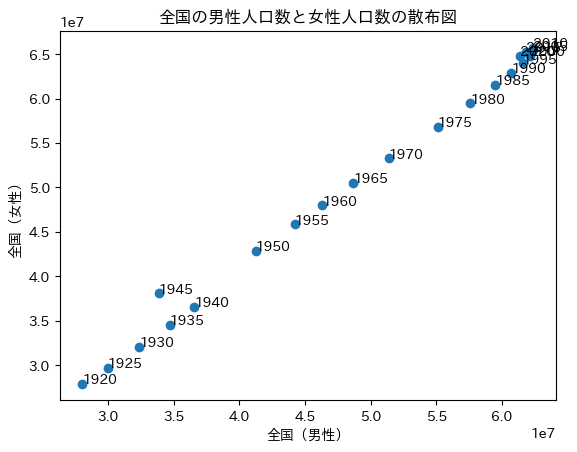

In [20]:
# データラベルを追加する
# プロットの作成
plt.plot(time_series_sample['全国（男性）'], time_series_sample['全国（女性）'], 'o') #x軸, y軸にプロットしたい変数の列を指定

# データラベルを追加
for i, label in enumerate(time_series_sample['年']): #ラベルにしたい列を指定して、順番に値を呼び出す
    plt.annotate(label, (time_series_sample['全国（男性）'][i], time_series_sample['全国（女性）'][i])) #i番目のx,y座標位置にi番目の都市を表示する

# タイトルと軸ラベルの追加
plt.title('全国の男性人口数と女性人口数の散布図')
plt.xlabel('全国（男性）')
plt.ylabel('全国（女性）')

# グラフの表示
plt.show()

### ヒストグラムの出力

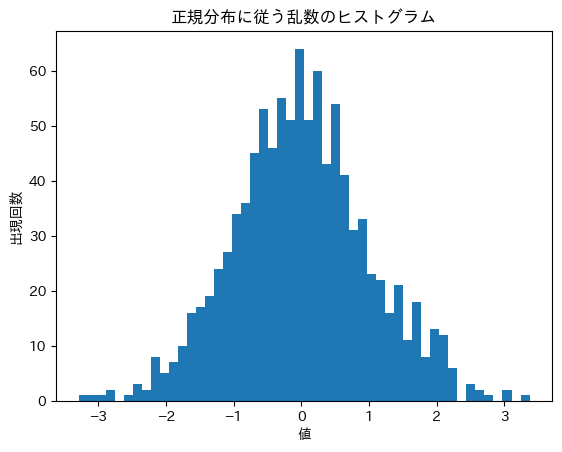

In [21]:
# 平均が0で標準偏差が1の正規分布から乱数を1,000個発生させる
x = np.random.randn(1000)

# ヒストグラムの描写
plt.hist(x, bins=50) #'bins'でビンの数を指定する

# タイトルと軸ラベルの追加
plt.title('正規分布に従う乱数のヒストグラム')
plt.xlabel('値')
plt.ylabel('出現回数')

# グラフの表示
plt.show()

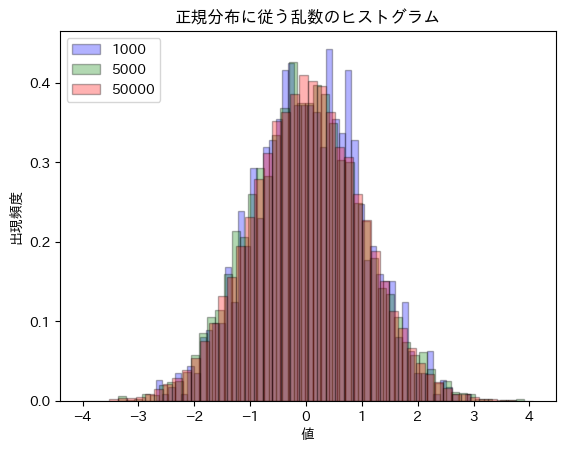

In [22]:
# ヒストグラムを重ねて表示する
# 平均が0で標準偏差が1の正規分布から乱数を1,000, 5,000, 50000個発生させる
x = np.random.randn(1000)
y = np.random.randn(5000)
z = np.random.randn(50000)

# ヒストグラムの描写
plt.hist(x, bins=50, label='1000', facecolor='blue', edgecolor='black', alpha=0.3, density=True) # alpha は透明度, density=Trueで頻度に正規化
plt.hist(y, bins=50, label='5000', facecolor='green', edgecolor='black', alpha=0.3, density=True) # alpha は透明度, density=Trueで頻度に正規化
plt.hist(z, bins=50, label='50000', facecolor='red', edgecolor='black', alpha=0.3, density=True) # alpha は透明度, density=Trueで頻度に正規化

# タイトルと軸ラベルの追加
plt.title('正規分布に従う乱数のヒストグラム')
plt.xlabel('値')
plt.ylabel('出現頻度')

# 凡例の表示
plt.legend(loc='upper left')

# グラフの表示
plt.show()

## 練習

## Pandasの練習

In [23]:
# データの読み込み
#練習 1 'panel_sample.csv'をDataframeとして読み込んで、最初の10行のデータを表示してください。練習 2~12まで練習 1で読み込んだデータを処理してください。
print('データソース：埼玉県推計人口') #データソースを表示
...

データソース：埼玉県推計人口


Ellipsis

In [24]:
# データの操作 1
# 練習 2 読み込んだデータから任意の10行分のデータを抽出してください。ただし、最初の10行以外の行を表示してください。
...

Ellipsis

In [ ]:
# データの操作 2
# 練習 3 任意の2列分のデータを抽出してください。
...

In [ ]:
# データの操作 3
# 練習 4 「熊谷市」の行のデータを抽出してください
...

In [ ]:
# データの操作 4
# 練習 5 'kumagaya_jinkou'に「熊谷市」の人口を代入して、出力してください。
...
print(f'熊谷市の人口: {...} 人')

In [ ]:
# データの追加
# 練習 6 1世帯あたりの人口数を計算し、'人口/世帯数'という名前の列として追加してください。
...

## Numpyの練習

In [ ]:
# PandasのデータをNumpyで処理 1
# 練習 7 '人口/世帯数'をNumpyの1次元のarray形式に変換して、出力してください。
...

In [ ]:
# PandasのデータをNumpyで処理 2
# 練習 8 '人口'と'世帯数'をNumpyの2次元のarray形式に変換して、出力してください。
...

In [ ]:
# 最大値、最小値、平均値、中央値、合計などの計算 1
# 練習 9 練習7で出力した1次元行列から1世帯あたり人口の最大値、最小値、平均値のどれかを計算し、出力してください。
...
print(f'1世帯あたり人口の（最大値、最小値、平均値）: {...}')

In [ ]:
# 最大値、最小値、平均値、中央値、合計などの計算 2
# 練習 10 練習8で出力した2次元行列から人口と世帯数の最大値、最小値、平均値のどれかを計算し、出力してください。
...
print(f'人口の（最大値、最小値、平均値）: {...}')
print(f'世帯数の（最大値、最小値、平均値）: {...}')

## Matplotlibの練習

In [ ]:
# 散布図の出力
# 練習 11 '人口'と'前月からの増加数'の散布図を作成してください。タイトルや軸ラベル等も適切に表示してください。
...

In [ ]:
# ヒストグラムの出力
# 練習 12 '人口/世帯数'の散布図を作成してください。タイトルや軸ラベル等も適切に表示してください。ビンの数は指定しなくて構わない。
...